# This notebook handles **loading and inspecting the Free Spoken Digit Dataset (FSDD) WAV files and demonstrates our audio preprocessing pipeline.**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install librosa numpy matplotlib --quiet

In [6]:
# Installs & imports
import os, glob
import librosa, numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append(os.path.join(os.getcwd(), '/content/drive/MyDrive/speech_command_adversarial/utils'))
from audio_utils import load_audio, preprocess_audio

In [7]:
# collect all file paths & labels
wav_paths = sorted(glob.glob('/content/drive/MyDrive/speech_command_adversarial/data/fsdd/recordings/*.wav'))
# filenames like "7_nicolas_45.wav" → label = first character
labels = [int(os.path.basename(p)[0]) for p in wav_paths]

In [8]:
print("Total samples:", len(wav_paths))
print("Classes:", sorted(set(labels)))

Total samples: 3000
Classes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


* load_audio(path, sr=None) for reading WAV files with librosa.

* preprocess_audio(wav, orig_sr, target_sr, duration) for resampling, trimming/padding to exactly 1 s, and normalizing.

Prints the shape of the processed waveform ((8000,)) and plots it using matplotlib, labeled by its digit.

Preprocessed shape: (8000,)


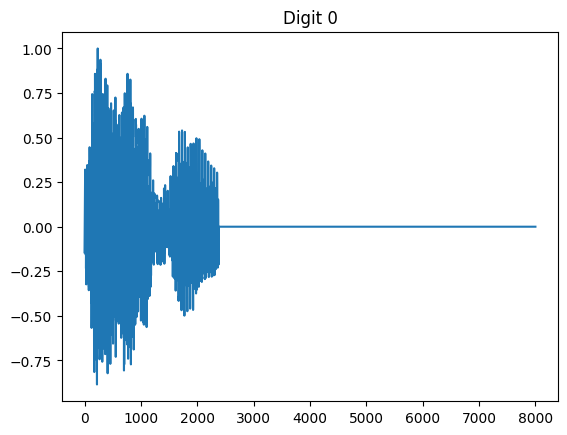

In [9]:
# preprocess & visualize one example
wav, sr = load_audio(wav_paths[0], sr=None)
x = preprocess_audio(wav, sr, target_sr=8000, duration=1.0)
print("Preprocessed shape:", x.shape)  # (8000,)
plt.plot(x); plt.title(f"Digit {labels[0]}"); plt.show()